In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_fscore_support

# read in flight data
flight = pd.read_csv('data/raw/Airline_Delay_Cause.csv')
late_threshhold = 20 * 60
flight['late'] = np.where(flight['late_aircraft_delay'] <= late_threshhold, 0, 1) # collapse values in column

# standardize data
flight['arr_flights'] = (flight.arr_flights - flight.arr_flights.mean()) / flight.arr_flights.std()
flight['arr_del15'] = (flight.arr_del15 - flight.arr_del15.mean()) / flight.arr_del15.std()
flight['carrier_ct'] = (flight.carrier_ct - flight.carrier_ct.mean()) / flight.carrier_ct.std()
flight['weather_ct'] = (flight.weather_ct - flight.weather_ct.mean()) / flight.weather_ct.std()
flight['nas_ct'] = (flight.nas_ct - flight.nas_ct.mean()) / flight.nas_ct.std()
flight['security_ct'] = (flight.security_ct - flight.security_ct.mean()) / flight.security_ct.std()
flight['late_aircraft_ct'] = (flight.late_aircraft_ct - flight.late_aircraft_ct.mean()) / flight.late_aircraft_ct.std()
flight['arr_cancelled'] = (flight.arr_cancelled - flight.arr_cancelled.mean()) / flight.arr_cancelled.std()
flight['arr_diverted'] = (flight.arr_diverted - flight.arr_diverted.mean()) / flight.arr_diverted.std()
flight['arr_delay'] = (flight.arr_delay - flight.arr_delay.mean()) / flight.arr_delay.std()
flight['carrier_delay'] = (flight.carrier_delay - flight.carrier_delay.mean()) / flight.carrier_delay.std()
flight['weather_delay'] = (flight.weather_delay - flight.weather_delay.mean()) / flight.weather_delay.std()
flight['nas_delay'] = (flight.nas_delay - flight.nas_delay.mean()) / flight.nas_delay.std()
flight['security_delay'] = (flight.security_delay - flight.security_delay.mean()) / flight.security_delay.std()
flight['late_aircraft_delay'] = (flight.late_aircraft_delay - flight.late_aircraft_delay.mean()) / flight.late_aircraft_delay.std()
flight = flight.dropna()

In [2]:
# perform knn
flightsX = flight[['late_aircraft_delay']].values
#                   , 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 
#                   'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].values
flightsY = flight[['late']].values
flightsX = flightsX[:1000]
flightsY = flightsY[:1000]

# do train test split 
X_train, X_test, y_train, y_test = train_test_split(flightsX, flightsY, test_size = 0.4)
nn = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='auto')
fit = nn.fit(flightsX)
distances, indices = fit.kneighbors(flightsX)

# do predictions
y_pred = []
for i in range(len(flightsX)):
    nbrs = flight.iloc[indices[i]]
    nbrs = nbrs.drop(flight.index[i], errors='ignore')
    ontime = nbrs[nbrs.late == 0].count().late
    late = nbrs[nbrs.late == 1].count().late
    predict = 0 if (ontime > late) else 1
    y_pred.append(predict)   

# display results
(p, r, f, s) = precision_recall_fscore_support(flightsY, y_pred, labels=[1])
display(f'Precision -> {p[0]}')
display(f'   Recall -> {r[0]}')
display(f'       F1 -> {f[0]}')

# arr_flights
#'Precision -> 0.7325227963525835'
#'   Recall -> 0.7850162866449512'
#'       F1 -> 0.7578616352201258'
# ------------------------------------
# carrier_ct
#'Precision -> 0.6907514450867052'
#'   Recall -> 0.7785016286644951'
#'       F1 -> 0.7320061255742726'
# ------------------------------------
# weather_ct
#'Precision -> 0.5222222222222223'
#'   Recall -> 0.6123778501628665'
#'       F1 -> 0.5637181409295352'
# ------------------------------------
# nas_ct
#'Precision -> 0.6930091185410334'
#'   Recall -> 0.742671009771987'
#'       F1 -> 0.7169811320754716'
# ------------------------------------
# security_ct
#'Precision -> 0.8203592814371258'
#'   Recall -> 0.44625407166123776'
#'       F1 -> 0.5780590717299579'
# ------------------------------------
# late_aircraft_ct
#'Precision -> 0.8801261829652997'
#'   Recall -> 0.9087947882736156'
#'       F1 -> 0.8942307692307693'
# ------------------------------------
# arr_cancelled
#'Precision -> 0.7738693467336684'
#'   Recall -> 0.501628664495114'
#'       F1 -> 0.6086956521739131'
# ------------------------------------
# arr_diverted
#'Precision -> 0.7407407407407407'
#'   Recall -> 0.19543973941368079'
#'       F1 -> 0.30927835051546393'
# ------------------------------------
# arr_delay
#'Precision -> 0.7663817663817664'
#'   Recall -> 0.8762214983713354'
#'       F1 -> 0.817629179331307'
# ------------------------------------
# carrier_delay
#'Precision -> 0.6521739130434783'
#'   Recall -> 0.7817589576547231'
#'       F1 -> 0.7111111111111111'
# ------------------------------------
# weather_delay
#'Precision -> 0.5069252077562327'
#'   Recall -> 0.5960912052117264'
#'       F1 -> 0.5479041916167665'
# ------------------------------------
# nas_delay
#'Precision -> 0.6816901408450704'
#'   Recall -> 0.7882736156351792'
#'       F1 -> 0.7311178247734139'
# ------------------------------------
# security_delay
#'Precision -> 0.8113207547169812'
#'   Recall -> 0.4201954397394137'
#'       F1 -> 0.5536480686695279'
# ------------------------------------
# late_aircraft_delay
#'Precision -> 0.9967532467532467'
#'   Recall -> 1.0'
#'       F1 -> 0.9983739837398374'


'Precision -> 0.9967532467532467'

'   Recall -> 1.0'

'       F1 -> 0.9983739837398374'

<BarContainer object of 14 artists>

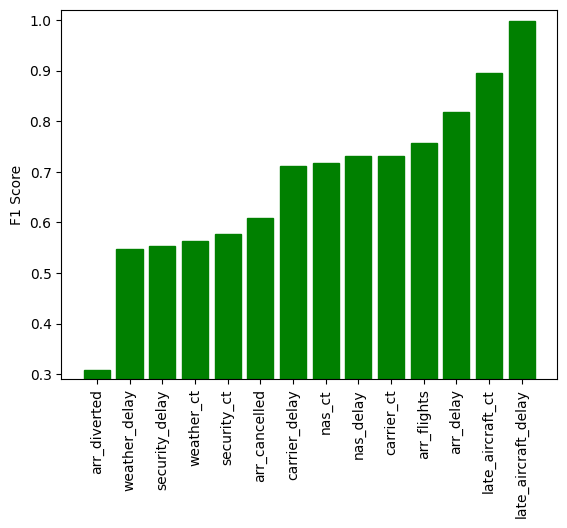

In [3]:
delays = {'arr_diverted':0.30927835051546393, 
          'weather_delay':0.5479041916167665, 
          'security_delay':0.5536480686695279,
          'weather_ct':0.5637181409295352,
          'security_ct':0.5780590717299579, 
          'arr_cancelled':0.6086956521739131,
          'carrier_delay':0.7111111111111111, 
          'nas_ct':0.7169811320754716, 
          'nas_delay':0.7311178247734139, 
          'carrier_ct':0.7320061255742726,
          'arr_flights':0.7578616352201258, 
          'arr_delay':0.817629179331307, 
          'late_aircraft_ct':0.8942307692307693, 
          'late_aircraft_delay':0.9983739837398374 }

import matplotlib.pyplot as plt
bar = plt.bar(*zip(*delays.items()))
plt.xticks(rotation=90)
plt.ylim(0.29, 1.02)
for i in range(len(delays)):
    bar[i].set_color('green')
plt.ylabel('F1 Score')
bar

In [4]:
# do knn on balanced csv
flights = pd.read_csv('data/raw/small.csv')
flights = flights.dropna()

# standardize data
flights['DEP_DELAY'] = (flights.DEP_DELAY - flights.DEP_DELAY.mean()) / flights.DEP_DELAY.std()
flights['TAXI_OUT'] = (flights.TAXI_OUT - flights.TAXI_OUT.mean()) / flights.TAXI_OUT.std()
#flights['ARR_DEL15'] = (flights.ARR_DEL15 - flights.ARR_DEL15.mean()) / flights.ARR_DEL15.std()
flights['DISTANCE'] = (flights.DISTANCE - flights.DISTANCE.mean()) / flights.DISTANCE.std()

In [11]:
flightsX = flights[['DEP_DELAY', 'TAXI_OUT', 'DISTANCE']].values
flightsY = flights[['ARR_DEL15']].values
flightsX = flightsX[:1000]
flightsY = flightsY[:1000]

# do train test split 
X_train, X_test, y_train, y_test = train_test_split(flightsX, flightsY, test_size = 0.4)
nn = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='auto')
fit = nn.fit(flightsX)
distances, indices = fit.kneighbors(flightsX)

# do predictions
y_pred = []
for i in range(len(flightsX)):
    if (i % 100 == 0):
        print(i)
    nbrs = flights.iloc[indices[i]]
    nbrs = nbrs.drop(flights.ARR_DEL15, errors='ignore')
    ontime = nbrs[nbrs.ARR_DEL15 == 0].count().ARR_DEL15
    late = nbrs[nbrs.ARR_DEL15 == 1].count().ARR_DEL15
    predict = 0 if (ontime > late) else 1
    y_pred.append(predict)   

# display results
(p, r, f, s) = precision_recall_fscore_support(flightsY, y_pred, labels=[1])
display(f'Precision -> {p[0]}')
display(f'   Recall -> {r[0]}')
display(f'       F1 -> {f[0]}')

0
100
200
300
400
500
600
700
800
900


'Precision -> 0.9354838709677419'

'   Recall -> 0.7733333333333333'

'       F1 -> 0.8467153284671532'